In [184]:
## Load Imports ##
import nibabel as nib
import numpy as np
from scipy import stats


import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from metrics import dice_coef
from data_generator import DataGenerator
from data_loader import *

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

def thresholdMask(mask, threshold=0.56):
    mask[mask >= threshold] = 1.0
    mask[mask < threshold] = 0.0
    return mask


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
slice_type = 'back'
train_dir = ('../slice_data_' + slice_type + '_val')
dim =(256,256)
# Loading Data
print('Loading Data...')
partition={}
(partition['x_train'],
partition['y_train'],
partition['x_val'],
partition['y_val'],
partition['x_test'],
partition['y_test'])  = load_data(train_dir, split=(0.05, 0.05, 99.9))
# Parameters for input data
params1 = {'dim': dim,
          'batch_size': 1,
          'n_channels': 1,
          'shuffle': False}

training_generator = DataGenerator(partition['x_train'], partition['y_train'], **params1)

print(len(training_generator))
for input_ex in partition['x_train']:
    print(input_ex)


Loading Data...
5
../slice_data_back_val/IXI086-Guys-0728-T1_back_91.nii
../slice_data_back_val/IXI196-Guys-0805-T1_back_29.nii
../slice_data_back_val/IXI465-HH-2176-T1_back_166.nii
../slice_data_back_val/IXI367-Guys-0917-T1_back_231.nii
../slice_data_back_val/IXI205-HH-1649-T1_back_239.nii


-------- Input ---------
(256, 256)


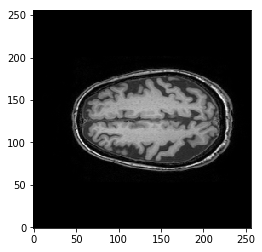

DescribeResult(nobs=65536, minmax=(0.0, 1.0), mean=0.1151324307733006, variance=0.04378791586200015, skewness=1.6533791695235107, kurtosis=1.2759360034994307)
-------- Mask Edited ---------
(256, 256)


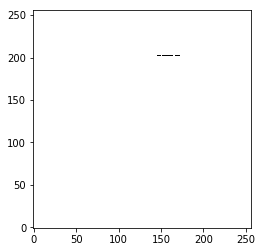

DescribeResult(nobs=65536, minmax=(0.0, 1.0), mean=0.9996490478515625, variance=0.0003508343343341106, skewness=-53.351585313120594, kurtosis=2844.3916554231855)
-------- Original ---------


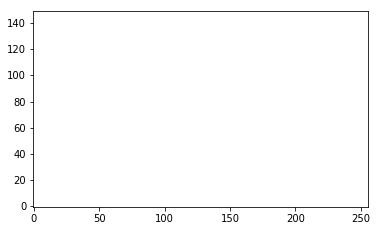

DescribeResult(nobs=38400, minmax=(0, 1), mean=0.9994010416666667, variance=0.0005986151711850134, skewness=-40.82359387301175, kurtosis=1664.5658167086037)
-------- Predicted ---------


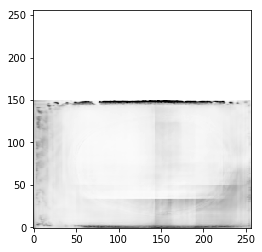

DescribeResult(nobs=65536, minmax=(0.38631657, 1.0), mean=0.96012324, variance=0.0040107863, skewness=-3.806469678878784, kurtosis=22.585732765637044)
-------- Predicted ---------


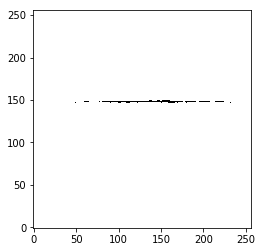

-------- Dice Coef. ---------


0.0

In [190]:
%matplotlib inline
#example to look at
num_example = 2
example_x = ((training_generator[num_example])[0])[0, :, :, 0]
example_y = ((training_generator[num_example])[1])[0, :, :, 0]

print('-------- Input ---------')
print(example_x.shape)
show_slice(example_x)
plt.show()
print(stats.describe(example_x, axis=None))

print('-------- Mask Edited ---------')
print(example_y.shape)
show_slice(example_y)
plt.show()
print(stats.describe(example_y, axis=None))

print('-------- Original ---------')
ex1 = partition['y_train'][num_example]
ex1_data = nib.load(ex1).get_data()
show_slice(ex1_data)
plt.show()
print(stats.describe(ex1_data, axis=None))

#../slice_data_back_val/IXI166-Guys-0846-T1_back_10.nii
print('-------- Predicted ---------')
ex1_pred = partition['y_train'][num_example].replace('mask_', 'mask_pred_')
ex1_pred = ex1_pred.replace('val','val_pred')
ex1_pred_data = (nib.load(ex1_pred).get_data())[:,:,0]
show_slice(ex1_pred_data)
plt.show()
print(stats.describe(ex1_pred_data, axis=None))

print('-------- Predicted ---------')
thresh = 0.50
thresh_pred = thresholdMask(ex1_pred_data, thresh)
show_slice(thresh_pred)
plt.show()

print('-------- Dice Coef. ---------')
# Predicted Dice Score
dice_coef(example_y, ex1_pred_data, threshold=thresh)



In [189]:
# Determine Dice Ceoficient
samples = 5
idx = 0
thresh = 0.50
for x, y in training_generator:
    example_x = ((x))[0, :, :, 0]
    example_y = ((y))[0, :, :, 0]
    # Get the predicted example
    ex1_pred = partition['y_train'][idx].replace('mask_', 'mask_pred_')
    ex1_pred = ex1_pred.replace('val','val_pred')
    ex1_pred_data = (nib.load(ex1_pred).get_data())[:,:,0]
    # Compute the dice coefficient
    dc = dice_coef(example_y, ex1_pred_data, threshold=thresh)
    print(dc)
    if samples == idx:
        break 
    idx+=1

0.41408034394730525
0.23874015748029614
0.0
0.0
0.0


IndexError: list index out of range

In [142]:
print(np.percentile(ex1_pred_data,0.51))
print(np.median(ex1_pred_data))

0.0
1.0
